<a href="https://colab.research.google.com/github/Anusree04/PCOS-PCOD-Prediction/blob/main/pcod_pcos_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [25]:
# Load the dataset
data = pd.read_csv('/content/PCOS_dataset.csv')  # Replace with the correct path to your dataset

# Display basic information
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   height^2                541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    float64
 9   Pulse rate(bpm)         541 non-null    float64
 10  RR (breaths/min)        541 non-null    float64
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    float64
 13  Cycle length(days)      541 non-null    float64
 14  Marraige Status (Yrs)   540 non-null    fl

In [26]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'height^2', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 45'],
      dtype='object')

In [27]:
# Inspect the dataset
print("Dataset shape:", data.shape)
print(data.head())
print(data.info())

Dataset shape: (999, 46)
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  height^2  \
0     1.0               1.0         0.0        28.0         44.6  2.310400   
1     2.0               2.0         0.0        36.0         65.0  2.608225   
2     3.0               3.0         1.0        33.0         68.8  2.722500   
3     4.0               4.0         0.0        37.0         65.0  2.190400   
4     5.0               5.0         0.0        25.0         52.0  2.592100   

   Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   ...  Fast food (Y/N)  \
0       152.0  19.30         15.0              78.0  ...              1.0   
1       161.5  24.92         15.0              74.0  ...              0.0   
2       165.0  25.27         11.0              72.0  ...              1.0   
3       148.0  29.67         13.0              72.0  ...              0.0   
4       161.0  20.06         11.0              72.0  ...              0.0   

   Reg.Exercise(Y/N)  BP _Systolic (mmHg)  

In [33]:
# Handle missing values
# Replace only invalid strings, not numeric values


data.replace('#NAME?', np.nan, inplace=True)

 # Replace invalid strings
 # Replace NaN in the target column with 0
y.fillna(0, inplace=True)
print("Unique values in y after correction:", y.unique())
print("Number of missing values in y after correction:", y.isnull().sum())


#data.fillna(data.mean(), inplace=True)  # Fill missing values with the mean

Unique values in y after correction: [0. 1.]
Number of missing values in y after correction: 0


In [30]:
# Select features and target
# Replace these columns with the ones present in your dataset
features = [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)']
target = 'PCOS (Y/N)'  # Update this to the actual target column name in your dataset

In [31]:
if not all(col in data.columns for col in features + [target]):
    print("Some specified columns are missing from the dataset. Please check column names.")
    exit()

X = data[features]
y = data[target]

# Check for empty data
if X.shape[0] == 0 or y.shape[0] == 0:
    print("The dataset is empty or no rows remain after preprocessing.")
    exit()


In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

In [35]:
print("Number of missing values in y:", y.isnull().sum())


Number of missing values in y: 0


In [36]:
print("Unique values in the target column (y):", y.unique())
print("Number of missing values in y:", y.isnull().sum())


Unique values in the target column (y): [0. 1.]
Number of missing values in y: 0



Model Evaluation:
Accuracy: 0.83
Confusion Matrix:
 [[158   9]
 [ 25   8]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       167
         1.0       0.47      0.24      0.32        33

    accuracy                           0.83       200
   macro avg       0.67      0.59      0.61       200
weighted avg       0.80      0.83      0.81       200



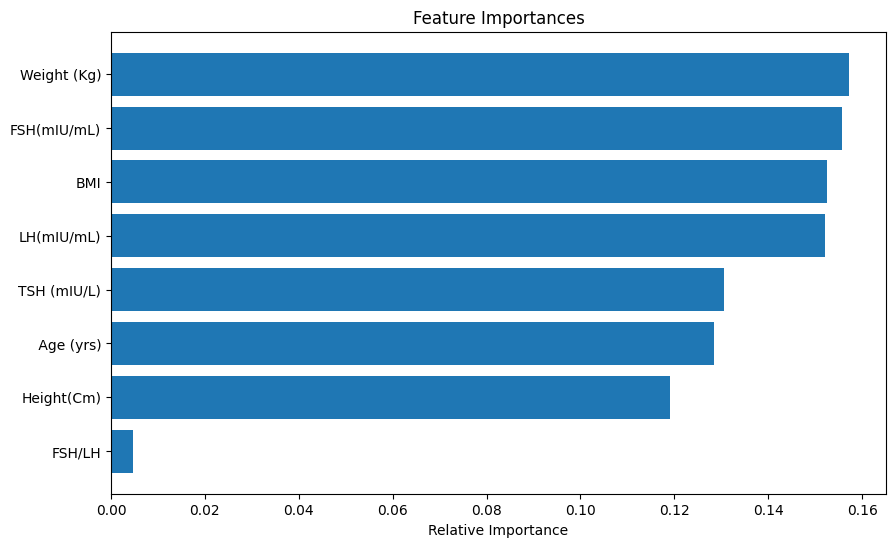

In [38]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
import pandas as pd
import numpy as np
import joblib

# Define the feature names (same as your model)
feature_names = [' Age (yrs)', 'Weight (Kg)',
        'Height(Cm)', 'BMI', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)']

def predict_pcos():
    # Load the model and scaler
    model = joblib.load('pcos_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Collect user input
    user_input = []
    print("Please provide the following information:")

    for feature in feature_names:
        while True:
            try:
                value = float(input(f"Enter {feature}: "))  # Get input as a float
                user_input.append(value)
                break
            except ValueError:
                print("Invalid input! Please enter a valid numeric value.")

    # Convert the input to a pandas DataFrame with the correct feature names
    user_input_df = pd.DataFrame([user_input], columns=feature_names)

    # Scale the input using the same scaler used during training
    user_input_scaled = scaler.transform(user_input_df)

    # Predict using the trained model
    prediction = model.predict(user_input_scaled)
    prediction_proba = model.predict_proba(user_input_scaled)  # For probabilities, if supported

    # Display the prediction
    if prediction[0] == 1:
        print("\nPrediction: The user might have PCOS/PCOD.")
    else:
        print("\nPrediction: The user does not have PCOS/PCOD.")

    # Optionally, display the probabilities
    print(f"Prediction confidence: {prediction_proba[0]}")

# Call the function to take user input and predict
predict_pcos()


Please provide the following information:
Enter  Age (yrs): 21
Enter Weight (Kg): 46
Enter Height(Cm): 145
Enter BMI: 21.9
Enter FSH(mIU/mL): 12
Enter LH(mIU/mL): 7.5
Enter FSH/LH: 1.6
Enter TSH (mIU/L): 1.9

Prediction: The user does not have PCOS/PCOD.
Prediction confidence: [0.51 0.49]
